<a href="https://colab.research.google.com/github/2303A53017/AIML-Lab-Batch-45-46/blob/main/Lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv('/content/drive/MyDrive/loan_data.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [57]:
print("Breakup of credit approval status.\n 1 means approved credit,\n 0 means not approved.")
print(df['credit.policy'].value_counts())

Breakup of credit approval status.
 1 means approved credit,
 0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


In [13]:
print(f"Top 5 criteria for Loan Approval:\n{df['purpose'].value_counts()}")

Top 5 criteria for Loan Approval:
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


In [14]:
print(f"Top 5 Int.Rates for Loan Approval:\n{df['int.rate'].value_counts()}")

Top 5 Int.Rates for Loan Approval:
int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64


Text(0.5, 0, 'FICO score')

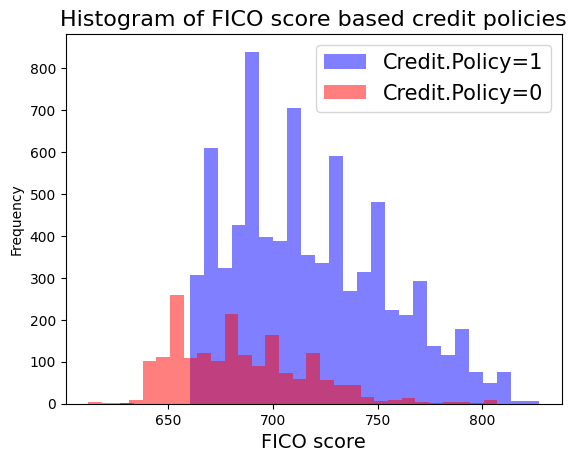

In [17]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,
                                             alpha=0.5,color='blue',
                                             label='Credit.Policy=1')

df[df['credit.policy']==0]['fico'].plot.hist(bins=30,
                                             alpha=0.5, color='red',
                                             label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title ("Histogram of FICO score based credit policies", fontsize=16)
plt.xlabel("FICO score", fontsize=14)

Text(0, 0.5, 'Interest rate')

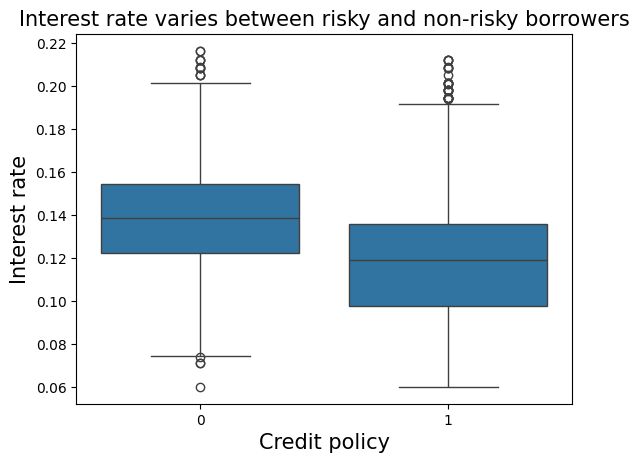

In [18]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Log. annual income')

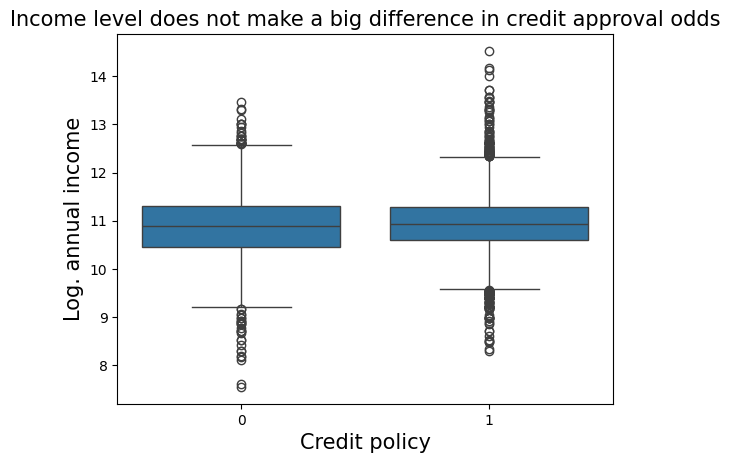

In [58]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Log. annual income",fontsize=15)

Text(0, 0.5, 'Days with credit line')

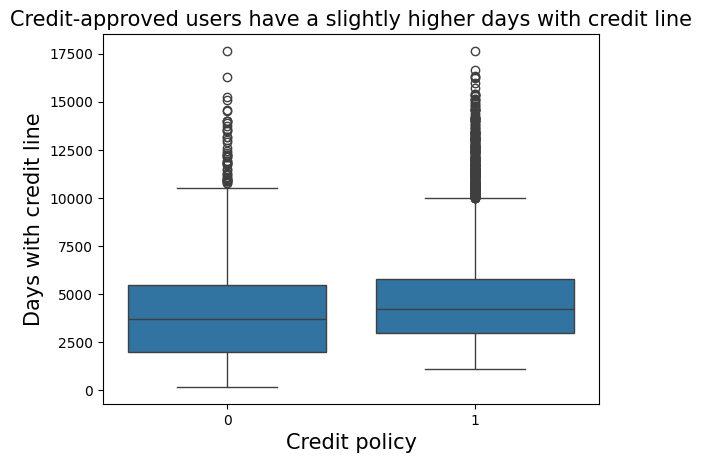

In [20]:
sns.boxplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a slightly higher days with credit line", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

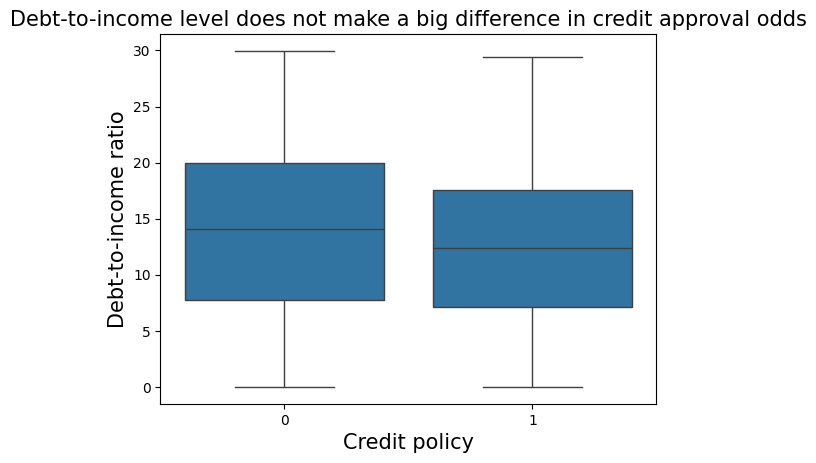

In [21]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make a big difference in credit approval odds", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

Text(0.5, 0, 'Purpose')

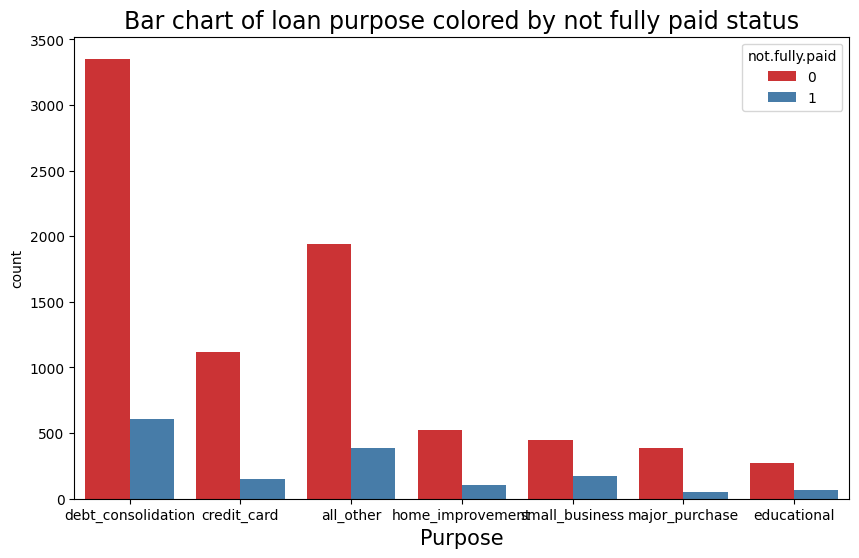

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored by not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

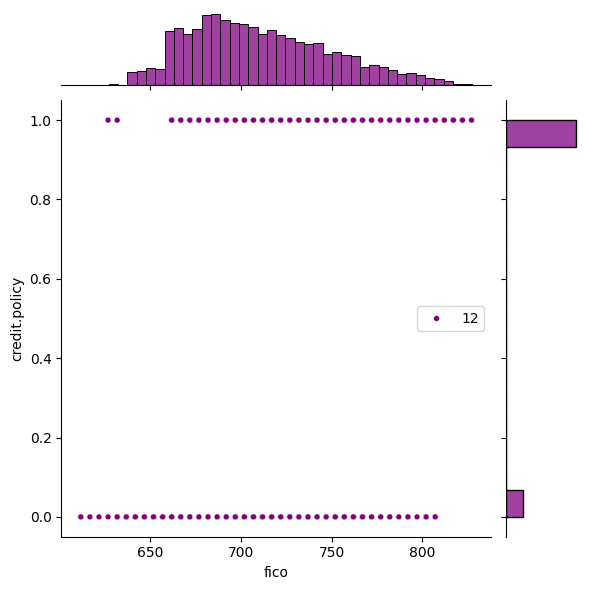

In [23]:
sns.jointplot(x='fico',y='credit.policy',data=df, color='purple', size=12)

<Figure size 1400x700 with 0 Axes>

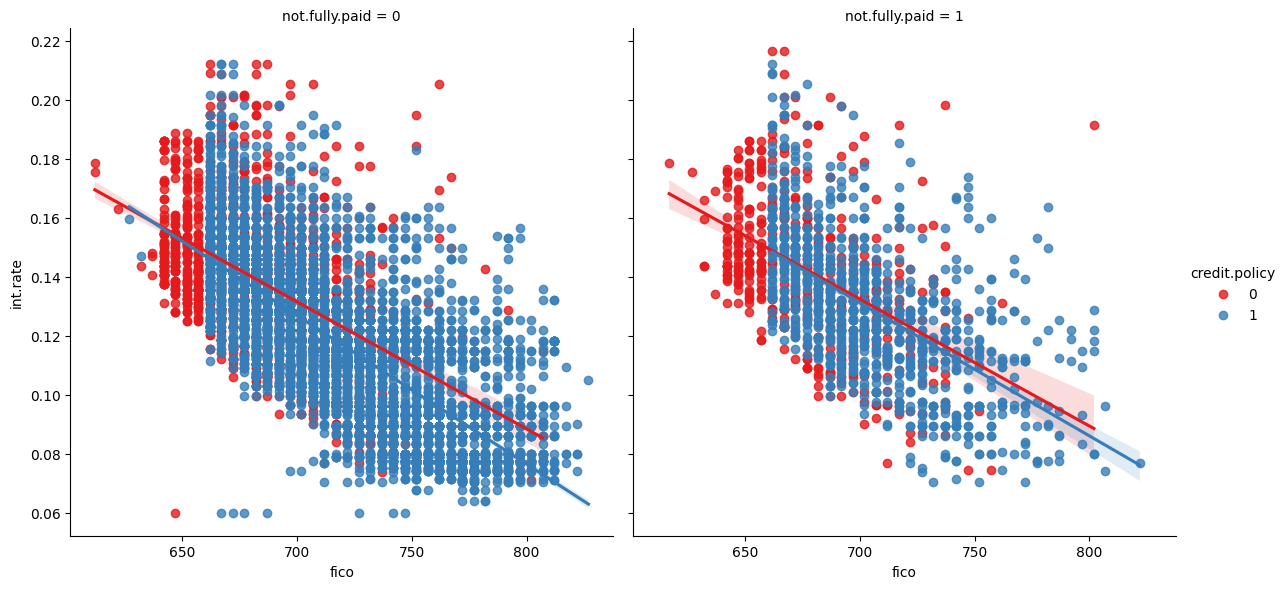

In [63]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1',height=6) # Change 'size' to 'height'

In [25]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)

In [26]:
df.shape, df_final.shape, df_final.columns[14:]

((9578, 14),
 (9578, 19),
 Index(['purpose_debt_consolidation', 'purpose_educational',
        'purpose_home_improvement', 'purpose_major_purchase',
        'purpose_small_business'],
       dtype='object'))

In [27]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [28]:
df_final.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9578, 19), (7662, 18), (1916, 18), (7662,), (1916,))

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier(criterion='log_loss',max_depth=None)

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss')

In [33]:
train_pred  = dtree.predict(X_train)
predictions = dtree.predict(X_test)

In [73]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
# your code to calculate the accuracy of your model
print(f"Accuracy of Train:{accuracy_score(y_train,train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,predictions)}")

Accuracy of Train:1.0
Accuracy of Test:0.7233820459290188


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1623
           1       0.16      0.19      0.18       293

    accuracy                           0.72      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.74      0.72      0.73      1916



In [74]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1329  294]
 [ 236   57]]
Accuracy of prediction: 0.723


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=1000)

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [40]:
rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

In [77]:
print(f"Accuracy of Train:{accuracy_score(y_train,rfc_train_pred)}")
print(f"Accuracy of Test:{accuracy_score(y_test,rfc_test_pred)}")

Accuracy of Train:1.0
Accuracy of Test:0.8465553235908142


In [78]:
cr = classification_report(y_test,predictions)

In [79]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1623
           1       0.16      0.19      0.18       293

    accuracy                           0.72      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.74      0.72      0.73      1916



In [80]:
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

[[1585   38]
 [ 272   21]]


In [81]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

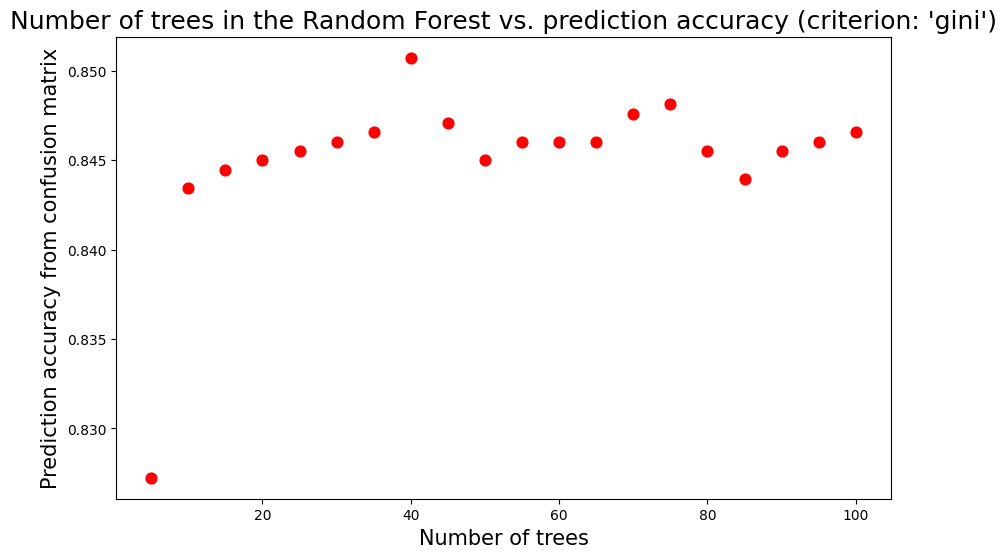

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [84]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

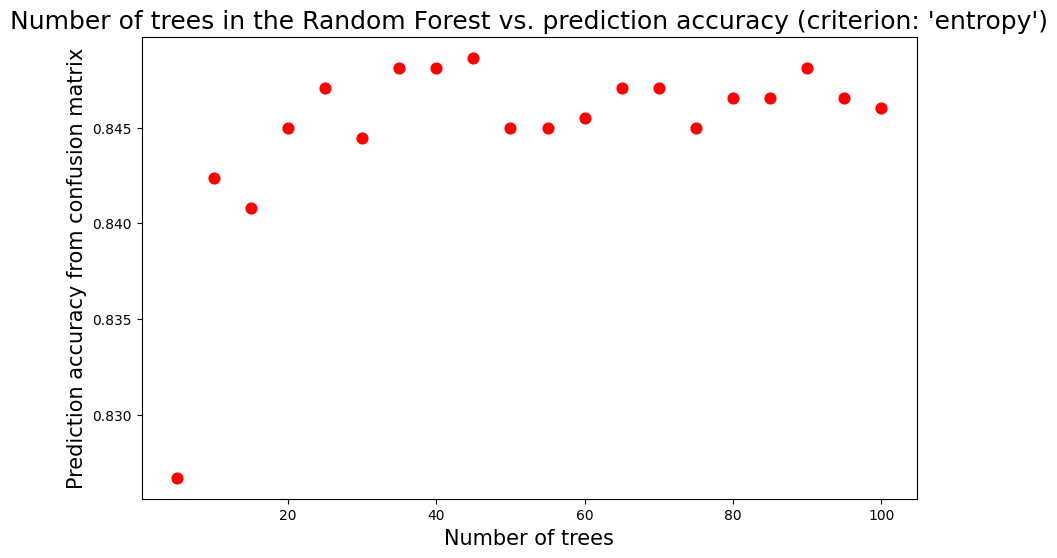

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [86]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

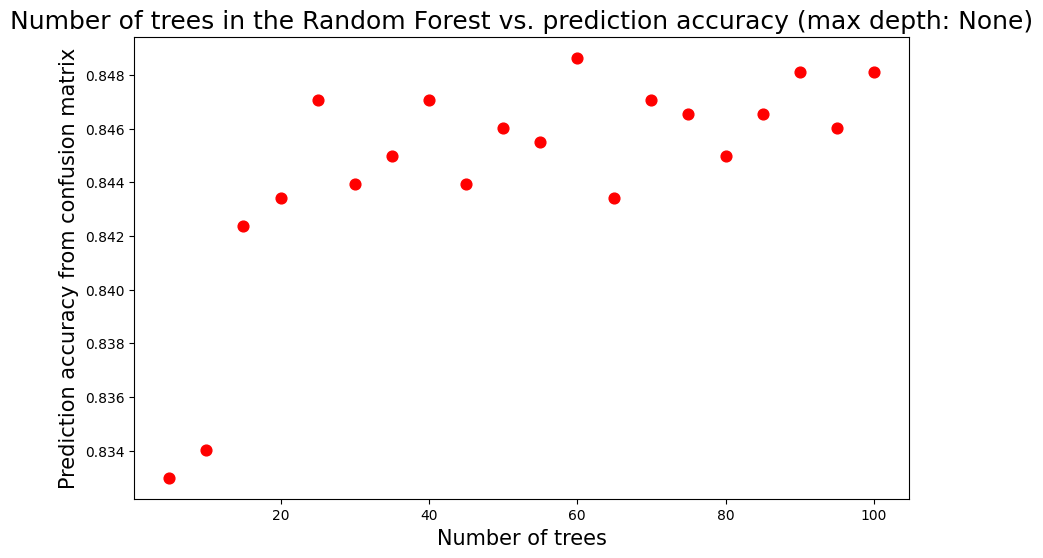

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [88]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

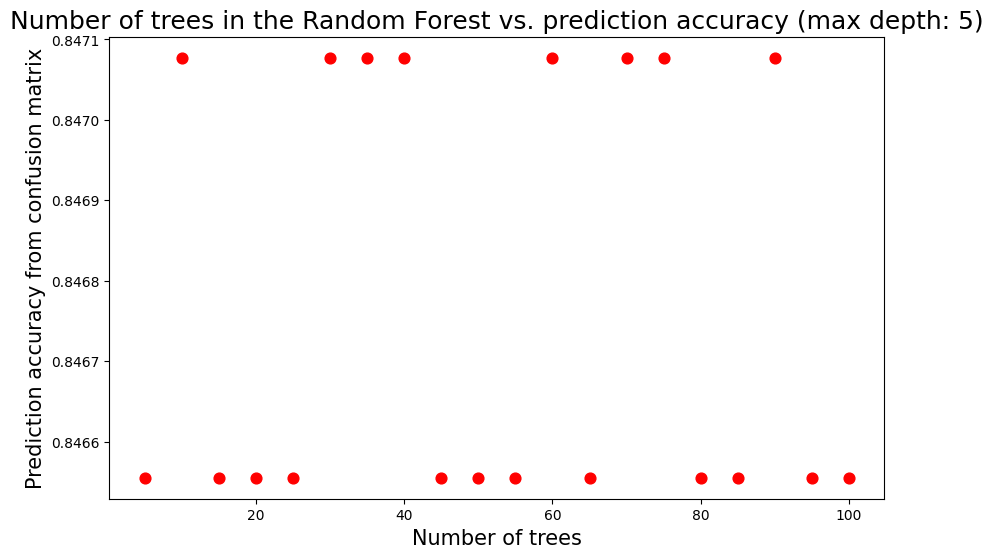

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [90]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

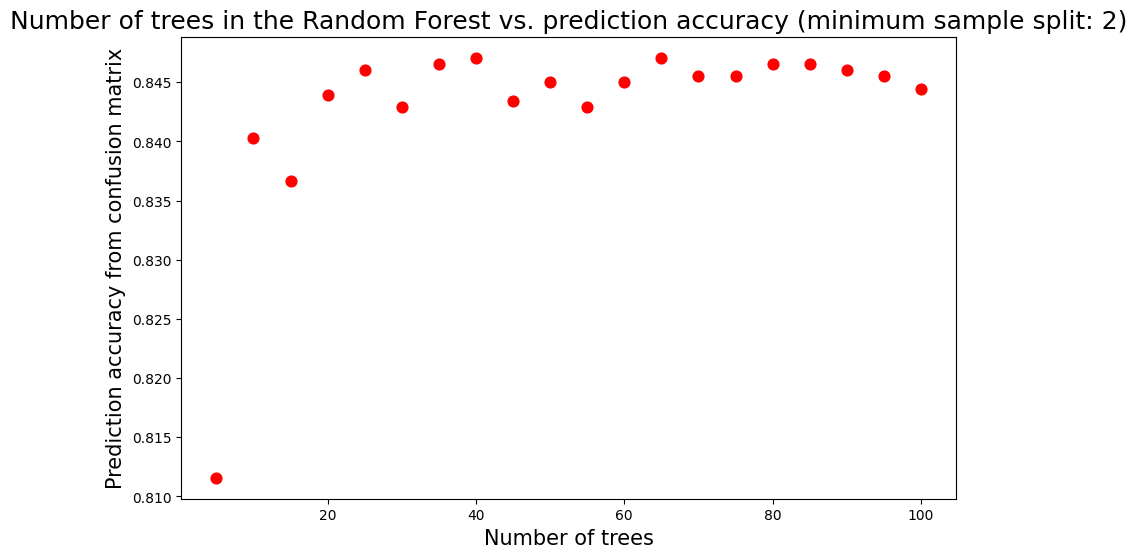

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [92]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

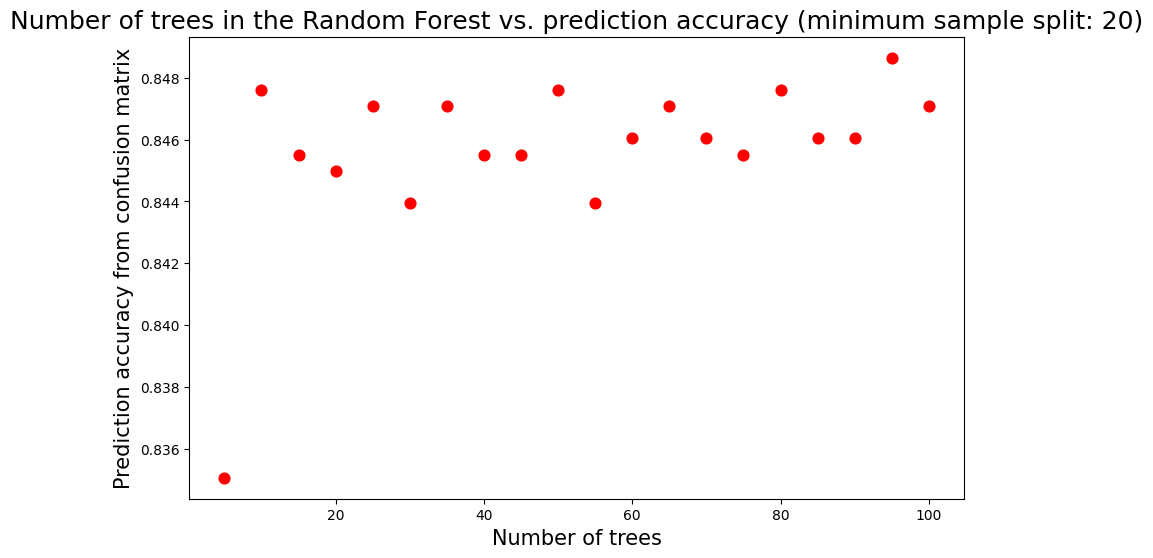

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)